In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pickle.load(open('./JoinedData.pkl','rb'))
df.dropna(how='any',inplace=True)
df.drop(columns=['FlightDate','date','ArrTime','ArrDel15','CRSArrTime','NearestDepTime'],inplace=True)

le = LabelEncoder()
df['Origin'] = le.fit_transform(df['Origin'])
df['Dest'] = le.fit_transform(df['Dest'])

df = df.apply(pd.to_numeric)
df = df[df['ArrDelayMinutes'] > 0]

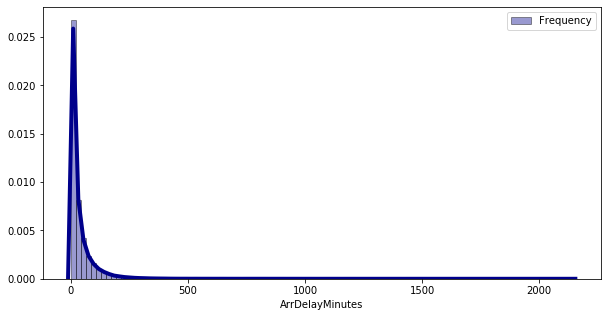

In [3]:
fig,ax = plt.subplots(figsize=(10,5))
sns.distplot(df['ArrDelayMinutes'], hist=True, kde=True,bins=100, color = 'darkblue',\
             hist_kws={'edgecolor':'black'},\
             kde_kws={'linewidth': 4},label = 'Frequency')
ax.legend(loc='upper right')
plt.savefig('./Images/DelayFrequencyHistogram.png')
plt.show()

In [4]:
class_0_100 = [False for i in range(df.shape[0])]
class_100_200 = [False for i in range(df.shape[0])]
class_200_500 = [False for i in range(df.shape[0])]
class_500_1000 = [False for i in range(df.shape[0])]
class_1000_2000 = [False for i in range(df.shape[0])]

for i in range(df.shape[0]):
    delay = df.iloc[i]['ArrDelayMinutes']
    
    if delay < 100:
        class_0_100[i] = True
    elif delay < 200:
        class_100_200[i] = True
    elif delay < 500:
        class_200_500[i] = True
    elif delay < 1000:
        class_500_1000[i] = True
    else:
        class_1000_2000[i] = True

        
df1 = df.where(pd.Series(class_0_100))
df1.dropna(how='any',inplace=True)
  
df2 = df.where(pd.Series(class_100_200))
df2.dropna(how='any',inplace=True)
  
df3 = df.where(pd.Series(class_200_500))
df3.dropna(how='any',inplace=True)
  
df4 = df.where(pd.Series(class_500_1000))
df4.dropna(how='any',inplace=True)
  
df5 = df.where(pd.Series(class_1000_2000))
df5.dropna(how='any',inplace=True)


In [5]:
regressor = pickle.load(open('./TrainedModels/XGBoostRegressor.pkl','rb'))

[21:36:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [6]:
from sklearn.metrics import *

# 0 - 100 Class Analysis

In [7]:
input_df = df1.iloc[:, df1.columns != 'ArrDelayMinutes']
actual_delay = df1.iloc[:, df1.columns == 'ArrDelayMinutes']

In [8]:
predicted_delay = regressor.predict(input_df)

In [9]:
print(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay))

209.049310916174


In [10]:
print(r2_score(y_pred=predicted_delay,y_true=actual_delay))

0.9442533728015021


In [11]:
print(mean_absolute_error(y_true=actual_delay,y_pred=predicted_delay))

9.819466570064264


In [12]:
print(np.sqrt(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay)))

14.45853764791495


# 100 - 200 Class Analysis

In [13]:
input_df = df2.iloc[:, df2.columns != 'ArrDelayMinutes']
actual_delay = df2.iloc[:, df2.columns == 'ArrDelayMinutes']

In [14]:
predicted_delay = regressor.predict(input_df)

In [15]:
print(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay))

209.83097291606373


In [16]:
print(r2_score(y_pred=predicted_delay,y_true=actual_delay))

0.9410494358281367


In [17]:
print(mean_absolute_error(y_true=actual_delay,y_pred=predicted_delay))

9.895076188617919


In [18]:
print(np.sqrt(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay)))

14.48554358372732


# 200 - 500 Class Analysis

In [19]:
input_df = df3.iloc[:, df3.columns != 'ArrDelayMinutes']
actual_delay = df3.iloc[:, df3.columns == 'ArrDelayMinutes']

In [20]:
predicted_delay = regressor.predict(input_df)

In [21]:
print(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay))

205.2117973492066


In [22]:
print(r2_score(y_pred=predicted_delay,y_true=actual_delay))

0.9423808541832065


In [23]:
print(mean_absolute_error(y_true=actual_delay,y_pred=predicted_delay))

9.713992770903271


In [24]:
print(np.sqrt(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay)))

14.325215438142862


# 500 - 1000 Class Analysis

In [25]:
input_df = df4.iloc[:, df4.columns != 'ArrDelayMinutes']
actual_delay = df4.iloc[:, df4.columns == 'ArrDelayMinutes']

In [26]:
predicted_delay = regressor.predict(input_df)

In [27]:
print(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay))

221.72594511684514


In [28]:
print(r2_score(y_pred=predicted_delay,y_true=actual_delay))

0.9195215946385705


In [29]:
print(mean_absolute_error(y_true=actual_delay,y_pred=predicted_delay))

9.825943333762032


In [30]:
print(np.sqrt(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay)))

14.890464906000926


# 1000 - 2000 Class Analysis

In [31]:
input_df = df5.iloc[:, df5.columns != 'ArrDelayMinutes']
actual_delay = df5.iloc[:, df5.columns == 'ArrDelayMinutes']

In [32]:
predicted_delay = regressor.predict(input_df)

In [33]:
print(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay))

220.01563935729368


In [34]:
print(r2_score(y_pred=predicted_delay,y_true=actual_delay))

0.9016472741194024


In [35]:
print(mean_absolute_error(y_true=actual_delay,y_pred=predicted_delay))

9.71894716860643


In [36]:
print(np.sqrt(mean_squared_error(y_pred=predicted_delay,y_true=actual_delay)))

14.832924167449036


# Compiled Data

| Range of Delay | MSE | $R^{2}$ SCORE |
| -----: | :-- | :-- | 
| 100 - 200 | 209.8309 | 0.9410 |
| 200 - 500 | 205.2117 | 0.9423 |
| 500 - 1000 | 221.7259 | 0.9195 |
| 1000 - 2000 | 220.0156 | 0.9016 |

In [37]:
np.max(df['ArrDelayMinutes'])

2142.0

In [ ]:
np.min(df['A'])